In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
dataset = 'dialysis'
pe_type = 'absolute'
run_file = f"./runs/runs_{dataset}_{pe_type}_20230420.csv"

In [3]:
df = pd.read_csv(run_file)
df.head()

,Start Time,Duration,Run ID,Name,Source Type,Source Name,User,Status,L,embedding_size,...,5yr_brier__avg,5yr_brier__interval,7yr_Ctd_ipcw__avg,7yr_Ctd_ipcw__interval,7yr_auroc__avg,7yr_auroc__interval,7yr_brier__avg,7yr_brier__interval,Ctd__avg,Ctd__interval
0,2023-04-19 17:54:56,47.1s,650281f298cb4ad4bec0668c21d50c1c,TRANS-TFI,LOCAL,C:\Users\youhs\Project\TRANS-TFI\scripts\train...,youhs,FINISHED,8.0,16.0,...,0.159563,0.010585,0.774172,0.014715,0.816879,0.018533,0.194119,0.010573,0.772716,0.013263
1,2023-04-19 17:38:08,44.3s,8df156697b3f458f908ade1a14ed13d6,TRANS-TFI,LOCAL,C:\Users\youhs\Project\TRANS-TFI\scripts\train...,youhs,FINISHED,4.0,16.0,...,0.159501,0.009156,0.767168,0.014823,0.807425,0.017155,0.192658,0.009344,0.772241,0.012460
2,2023-04-19 18:06:03,52.3s,aa8448f92cc04f5b8ae1d9720f70a548,TRANS-TFI,LOCAL,C:\Users\youhs\Project\TRANS-TFI\scripts\train...,youhs,FINISHED,38.0,16.0,...,0.154373,0.008706,0.768800,0.006122,0.814132,0.013822,0.177727,0.008966,0.771505,0.008443
3,2023-04-19 17:39:27,44.4s,6b7809afbd8d44b5ba1f53ddbfb5b97f,TRANS-TFI,LOCAL,C:\Users\youhs\Project\TRANS-TFI\scripts\train...,youhs,FINISHED,4.0,16.0,...,0.163202,0.010351,0.771168,0.012800,0.811229,0.017534,0.191582,0.009101,0.771210,0.013120
4,2023-04-19 18:04:02,49.1s,f207db7797524f64a0210f9a3fbb7cfa,TRANS-TFI,LOCAL,C:\Users\youhs\Project\TRANS-TFI\scripts\train...,youhs,FINISHED,47.0,16.0,...,0.155303,0.010333,0.766457,0.008483,0.810345,0.015114,0.177544,0.008519,0.770853,0.009873


In [4]:
df.shape

(53, 39)

In [5]:
score = 'Ctd__avg'
params = ['L', 'injection_type']

## Leader board

In [6]:
df.sort_values(by='Ctd__avg', ascending=False)[["Name", *params, score]]

,Name,L,injection_type,Ctd__avg
0,TRANS-TFI,8.0,linear,0.772716
1,TRANS-TFI,4.0,linear_norm,0.772241
2,TRANS-TFI,38.0,linear_norm,0.771505
3,TRANS-TFI,4.0,positional_encoding,0.771210
4,TRANS-TFI,47.0,linear_norm,0.770853
5,TRANS-TFI,92.0,linear,0.770602
6,TRANS-TFI,20.0,linear,0.770544
7,SurvTrace,11.0,NaN,0.769936
8,SurvTrace,20.0,NaN,0.768870
9,TRANS-TFI,20.0,positional_encoding,0.768444


In [7]:
survtrace_rows = df.loc[df['Name'].str.startswith('SurvTrace'), [*params, score]]
transtfi_rows  = df.loc[df['Name'].str.startswith('TRANS-TFI'), [*params, score]]

## Sequence length effect

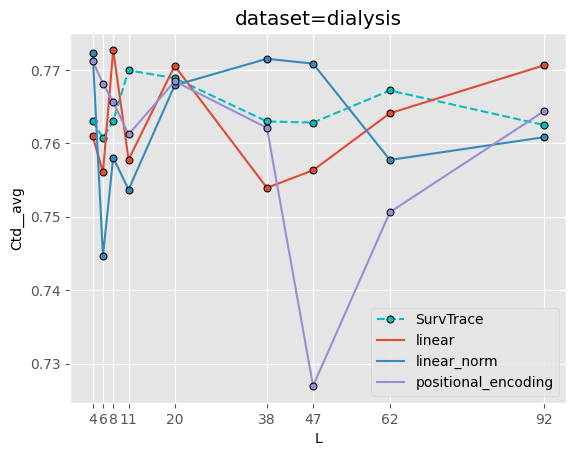

In [8]:
with plt.style.context('ggplot'):
    sns.lineplot(data=survtrace_rows, x='L', y=score, c='c', 
                 label='SurvTrace', marker='o', markeredgecolor='k', linestyle='--', markersize=5)
    sns.lineplot(data=transtfi_rows.sort_values(by=['L', 'injection_type']),  
                 x='L', y=score, hue='injection_type', marker='o',markeredgecolor='k', markersize=5)
    plt.xticks(transtfi_rows.L.unique())
    plt.title(f'dataset={dataset}')
    plt.legend(loc='lower right')
    plt.show()

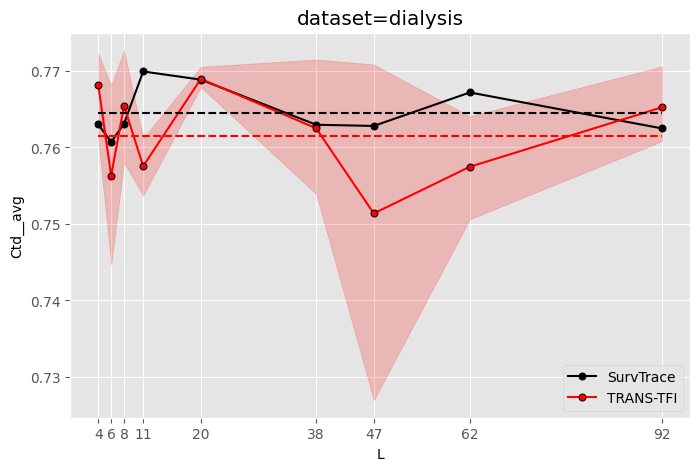

In [9]:
with plt.style.context('ggplot'):
    plt.figure(figsize=(8,5))
    sns.lineplot(data=survtrace_rows, x='L', y=score, c='k', 
                 label='SurvTrace', marker='o', markeredgecolor='k', markersize=5)
    sns.lineplot(data=transtfi_rows.sort_values(by=['L', 'injection_type']),  
                 x='L', y=score, c='r', marker='o',markeredgecolor='k', markersize=5, label='TRANS-TFI')
    plt.hlines(survtrace_rows[score].mean(), 4, 92, color='k', linestyle="--")
    plt.hlines(transtfi_rows[score].mean(), 4, 92, color='r', linestyle="--")
    plt.xticks(transtfi_rows.L.unique())
    plt.title(f'dataset={dataset}')
    plt.legend(loc='lower right')
    plt.show()

## Injection type effect
- Skip SurvTrace because it does not have `injection_type` parameter

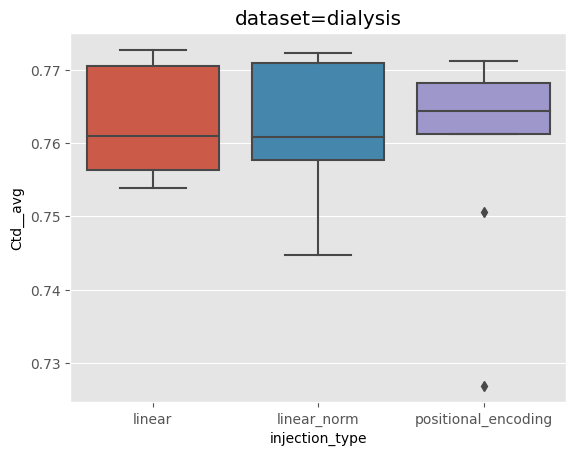

In [10]:
with plt.style.context('ggplot'):
    # sorting needed
    data = transtfi_rows.sort_values(by='injection_type', ascending=True)
    sns.boxplot(data=data, x='injection_type', y=score)
    plt.title(f'dataset={dataset}')
    plt.show()

## Learning Curves

In [37]:
log_file = '../scripts/logs/TRANS-TFI_dialysis_linear_delta5_full.csv'
history = pd.read_csv(log_file)

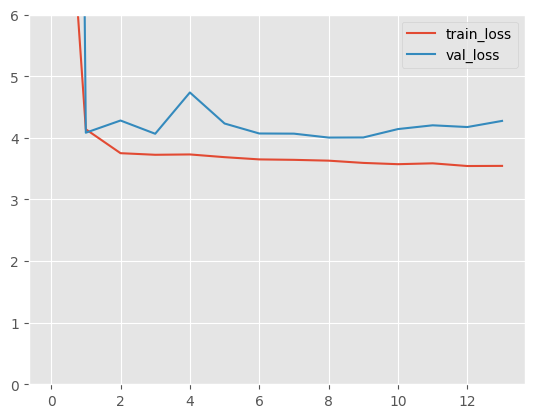

In [45]:
with plt.style.context('ggplot'):
    history[['train_loss', 'val_loss']].plot()
    plt.ylim(0, 6)
    plt.show()

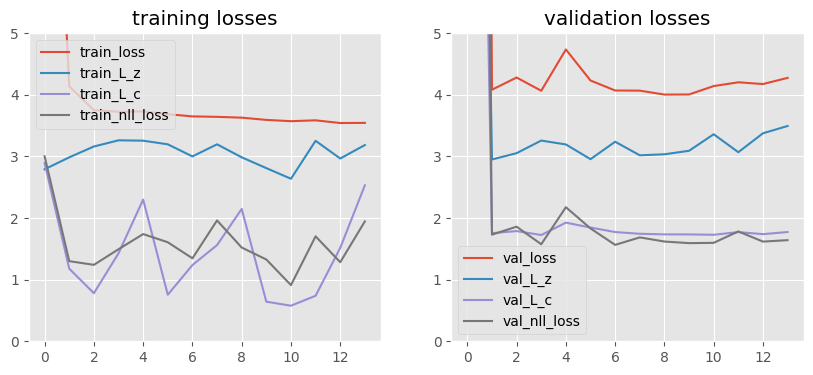

In [41]:
with plt.style.context('ggplot'):
    plt.figure(figsize=(10,4))
    ax = plt.subplot(121)
    history.loc[:, history.columns.str.startswith('train')].plot(ax=ax)
    ax.set_title('training losses')
    ax.set_ylim(0, 5)
    ax = plt.subplot(122)
    history.loc[:, history.columns.str.startswith('val')].plot(ax=ax)
    ax.set_title('validation losses')
    ax.set_ylim(0, 5)
    plt.show()

## Find best options
- select options yielding best validation score (not testing score)
- list of options : `time_interval`, `injection_type`

In [ ]:
def setup_config_for_transformers(model_name, dataset, injection_type, interval, time_range):
    # define the setup parameters
    STConfig.data = dataset
    if model_name == 'SurvTrace':
        STConfig.custom_training = False
        STConfig.injection_type = None
        STConfig.interval = interval
    if model_name == "TRANS-TFI":
        STConfig.custom_training = True
        STConfig.injection_type = injection_type
        STConfig.interval = interval
        
    if time_range == 'full':
        STConfig.horizons = [round(i, 2) / 100 for i in np.arange(5, 96, STConfig['interval'])]
    elif time_range == 'truncated':
        STConfig.horizons = [.25, .5, .75]
        
    seed = STConfig.seed # 1234 
    set_random_seed(seed)
    
def eval_transformers(model_name, dataset, 
                      injection_type=None, interval=None, time_range=None,
                      experiment_root='../scripts'):
    setup_config_for_transformers(model_name, dataset, injection_type, interval, time_range)
    
    # load data
    df, df_train, df_y_train, df_test, df_y_test, df_val, df_y_val = load_data_trs(STConfig)
    
    if dataset == 'dialysis':
        times = [365 * 1, 365 * 3, 365 * 5, 365 * 7] # evaluate at 1yr, 3yr, 5yr, 7yr
        horizons = [ f"{i}yr" for i in [1,3,5,7] ]
    else:
        times = STConfig['duration_index'][1:-1] # evaluate at 25%, 50%, 75% durations (default)
        horizons = STConfig['horizons']
    
    # get model
    model = SurvTraceSingle(STConfig)
    
    # initialize a trainer
    trainer = Trainer(model, dataset, injection_type, interval, time_range)
    trainer.ckpt = Path(experiment_root, trainer.ckpt)
    trainer.load_model_weights()
    model = trainer.model

    evaluator = Evaluator(df, df_train.index)
    result_dict = evaluator.eval(model, (df_test, df_y_test), 
                                 times=times, horizons=horizons, 
                                 confidence=.95, 
                                 nb_bootstrap=10)
    return result_dict